Write a program to extract the length, width and orientation of this cell, given that 1 pixel = 25 nm in this image. Note: the length is the widest part of the cell, the width the narrowest and the orientation is its angle relative to the horizontal (in degrees).

Tips (not required):

Create a binary mask from the image using thresholding or edge detection
Extract the contours in the binary image
Sort the contours by area so that the outline of the cell is the largest contour
Place an appropriate shape around this contour to extract its dimensions in pixels
Convert these pixel measurements to microns (μm) (1 micron = 1000 nm)
Design Specifications:

Your final design should be a single Jupyter Notebook, which, when run, will extract the dimensions of a dark cell on a bright background
The final output should be an image of the cell with the dimensions shown on the image as _____ μm x _____ μm and _____ °.
Your user interface should be simple. It should read in and output a single image
Refer to the General Assignment Guidelines to maximise your marks.

Text(0.5, 1.0, 'Cell Dimensions : 13.675μm x 7.6μm and is angled at __ Degrees')

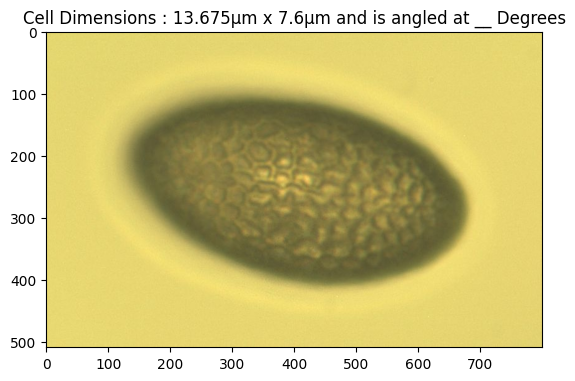

In [132]:
#Algorithm Overview
# Import necessary libraries
# Convert image to Greyscale 
# Apply adaptive threshold to the greyscale image to extract areas if interest 
# Invert the thresholded image
# Extract contours from the image
# Find the maximum contours in the image (Assume this is the cell)    
# Get the bounding box of the cell in pixels
# Calculate the width and height of the cell in pixels
# Crop the image to leave only the cell in the image
# Multiply height and width by 25 to calculate cell dimensions in nm
# Divide the height and width in nm by 1000 to calculate dimensions in microns
# Convert image from BGR to RGB
# Return original image using imShow() and display cell dimensions

# Import necessary libraries
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as image

I = cv2.imread('./pollen.jpg')

#Convert the original image to Grayscale
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to the grayscale image.
thresh = cv2.adaptiveThreshold(G, maxValue = 255,
                            adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            thresholdType = cv2.THRESH_BINARY,
                            blockSize = 45,
                            C = 3) 

#Invert the thresholded image
inverted = cv2.bitwise_not(thresh)

# Extract contours from the inverted image
contours, _ = cv2.findContours(inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the maximum contour (assuming its the cell)
maxContour = max(contours, key=cv2.contourArea)

# Get the bounding box of the cell
x, y, w, h = cv2.boundingRect(maxContour)

# Calculate the width and height of the cell
x = max(0, x)
y = max(0, y)
w = min(w, inverted.shape[1] - x)
h = min(h, inverted.shape[0] - y)

#Each pixel is 25nm so multiply height and width by 25
widthNM = w * 25
heightNM = h * 25

# Each micron is 1000nm so divide by 1000
width = widthNM / 1000
height = heightNM / 1000

#Convert the original image to Grayscale
RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

message = (f"Cell Dimensions : {width}μm x {height}μm and is angled at __ Degrees")

#Uncomment to return only the cropped cell with no background
#cropped = I[y:y+h, x:x+w]
#return cropped
fig, axs = plt.subplots(1)
axs.imshow(RGB)
axs.set_title(message)
